### **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

### **MERGED DATASET**

In [2]:
# Load each dataset
df1 = pd.read_csv("southjakarta_air_quality.csv")
df1["Location"] = "South Jakarta"

df2 = pd.read_csv("jakartaMarunda_air_quality.csv")
df2["Location"] = "Marunda, Jakarta Utara"

df3 = pd.read_csv("jakartakemayoran_air_quality.csv")
df3["Location"] = "Kemayoran, Jakarta Pusat"

df4 = pd.read_csv("jakartaGBK_air_quality.csv")
df4["Location"] = "Jakarta GBK"

df5 = pd.read_csv("BDNjakarta_air_quality.csv")
df5["Location"] = "Jalan BDN II, South Jakarta"
# Repeat for each dataset

# Concatenate them
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [3]:
# Normalisasi nama parameter menjadi huruf besar
data['Pollutant'] = data['Pollutant'].str.upper()


### **PREPROCESSING & VISUALISASI**

In [4]:
data.duplicated().sum()

0

In [5]:
data = data.drop(columns=["Avg", "Max", "Min"])

In [ ]:
# Rata-rata AQI per lokasi
aqi_lokasi = data.groupby('Location')['AQI'].mean().reset_index()
print("\nRata-rata AQI per lokasi:")
aqi_lokasi


Rata-rata AQI per lokasi:


,Location,AQI
0,Jakarta GBK,130.612022
1,"Jalan BDN II, South Jakarta",83.071038
2,"Kemayoran, Jakarta Pusat",175.000000
3,"Marunda, Jakarta Utara",111.000000
4,South Jakarta,107.000000



Rata-rata AQI per polutan:
  Pollutant         AQI
0        CO  130.612022
1         H  111.000000
2       NO2  130.612022
3        O3  137.537341
4       PM1  111.000000
5      PM10  121.336612
6      PM25  121.336612
7       SO2  130.612022
8         T  111.000000
9       UVI  141.000000


C:\Users\Michelle\AppData\Local\Temp\ipykernel_70048\2150845295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


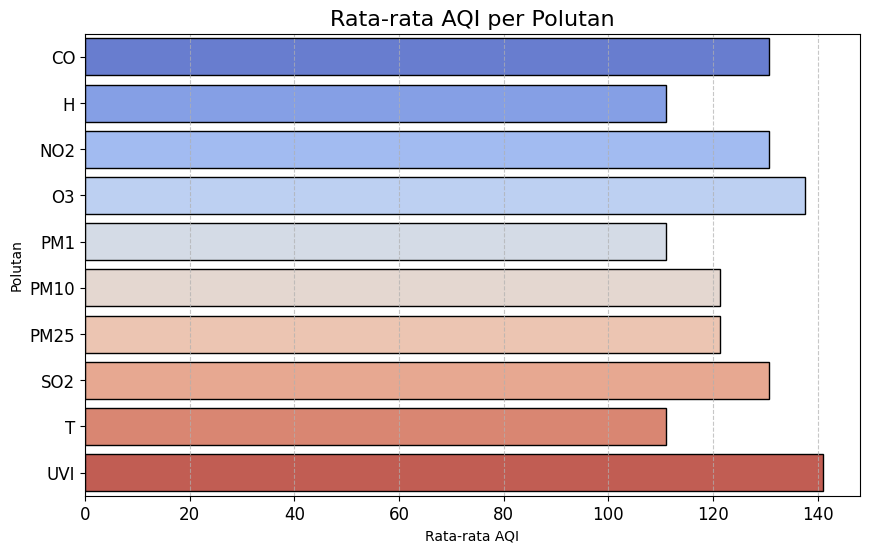

In [ ]:
# Rata-rata AQI per polutan
aqi_polutan = data.groupby('Pollutant')['AQI'].mean().reset_index()
print("\nRata-rata AQI per polutan:")
print(aqi_polutan)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x="AQI",
    y="Pollutant",
    data=aqi_polutan,
    palette="coolwarm",  # Warna gradasi dari dingin ke hangat berdasarkan AQI
    edgecolor="black"
)

# Menambahkan judul dan label
plt.title("Rata-rata AQI per Polutan", fontsize=16)
plt.xlabel("Rata-rata AQI")
plt.ylabel("Polutan")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


In [8]:
# Pastikan kolom Date dalam bentuk datetime
data['Date'] = pd.to_datetime(data['Date'])

# Kelompokkan data per Pollutant dan Location, lalu hitung rata-rata AQI
pollutant_per_location = data.groupby(['Location', 'Pollutant'])['AQI'].mean().unstack()


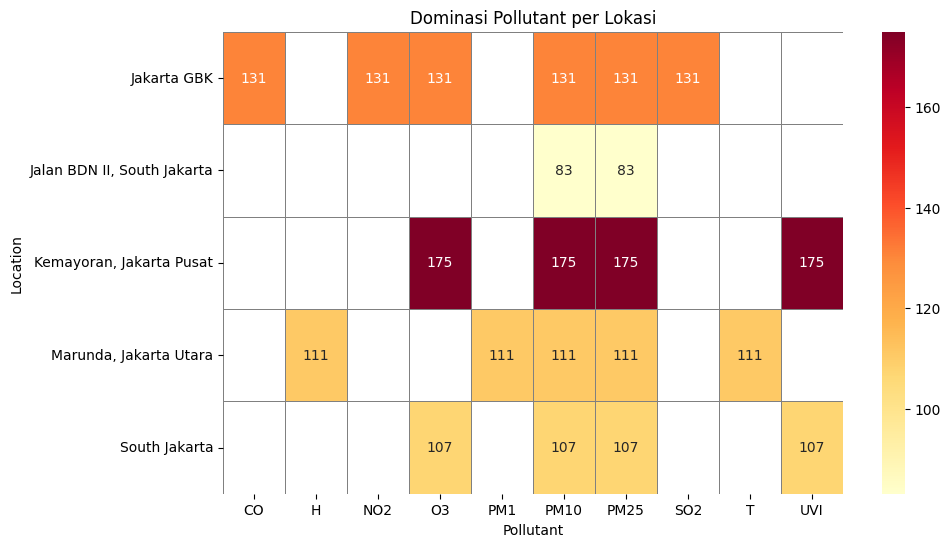

In [9]:
# Pastikan kolom Date dalam bentuk datetime
data['Date'] = pd.to_datetime(data['Date'])

# Kelompokkan data per Pollutant dan Location, lalu hitung rata-rata AQI
pollutant_per_location = data.groupby(['Location', 'Pollutant'])['AQI'].mean().unstack()

# Plot Heatmap dengan format integer
plt.figure(figsize=(10, 6))
sns.heatmap(pollutant_per_location, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Dominasi Pollutant per Lokasi")
plt.xlabel("Pollutant")
plt.ylabel("Location")
plt.show()


In [ ]:

# Your AQI data
data = [
    {"Location": "Jakarta GBK", "Latitude": -6.2154998779296875, "Longitude": 106.8030014038086, "AQI": 131},
    {"Location": "Jalan BDN II, South Jakarta", "Latitude": -6.280048383, "Longitude": 106.79944217205, "AQI": 83},
    {"Location": "Kemayoran, Jakarta Pusat", "Latitude": -6.1603721, "Longitude": 106.8473377, "AQI": 175},
    {"Location": "Marunda, Jakarta Utara", "Latitude":  -6.096574, "Longitude": 106.961349, "AQI": 111},
    {"Location": "South Jakarta", "Latitude": -6.236704,  "Longitude": 106.79324, "AQI": 107}
]

# Creating the map
jakarta_map = folium.Map(location=[-6.2, 106.85], zoom_start=11)

# Adding markers with wider permanent labels with improved styling
for entry in data:
    # Marker for the location
    folium.Marker(
        location=[entry["Latitude"], entry["Longitude"]],
        icon=folium.Icon(color="red" if entry["AQI"] > 100 else "green")
    ).add_to(jakarta_map)
    
    # Adding a permanent label with bold text and wider background
    folium.map.Marker(
        [entry["Latitude"], entry["Longitude"]],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 12px; color: black; font-weight: bold; background-color: white; '
                 f'padding: 8px 16px 8px 8px; border: 1px solid black; border-radius: 10px; min-width: 220px; text-align: center;">'
                 f'{entry["Location"]}<br>AQI: {entry["AQI"]}</div>'
        )
    ).add_to(jakarta_map)

# Saving the map with improved readability
map_path_permanent_label = "jakarta_aqi_map_with_wider_labels.html"
jakarta_map.save(map_path_permanent_label)

# Output the path to the saved map
map_path_permanent_label


'jakarta_aqi_map_with_wider_labels.html'

In [ ]:

display(jakarta_map)
